In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
df = pd.read_csv("Concrete_Data.csv")
# df.head()
df.fillna(value=df.median(), inplace=True)
input_name = df.columns[0]
output_name = df.columns[-1]

input_data = df[input_name].values.reshape(-1, 1)
output_data = df[output_name].values.reshape(-1, 1)

X_train, X_temp, y_train, y_temp = train_test_split(input_data, output_data, test_size=0.4, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(type(X_train))

<class 'numpy.ndarray'>


In [9]:
rmse_train = []
rmse_test = []
rmse_valid = []

for p in range(2,6):
    i = p-2

    poly_features = PolynomialFeatures(degree=p)

    x_poly_train = poly_features.fit_transform(X_train)
    x_poly_test = poly_features.fit_transform(X_test)
    x_poly_valid = poly_features.fit_transform(X_valid)

    regressor = LinearRegression()

    regressor.fit(x_poly_train, y_train)

    y_pred_train = regressor(x_poly_train)
    y_pred_test = regressor(x_poly_test)
    y_pred_valid = regressor(x_poly_valid)

    rmse_train[i] = mean_squared_error(y_pred_train, y_train)
    rmse_test[i] = mean_squared_error(y_pred_test, y_test)
    rmse_valid[i] = mean_squared_error(y_pred_valid, y_valid)

    print(f"RMSE for training data: {rmse_train[i]:.4f}")
    print(f"RMSE for testing data: {rmse_test[i]:.4f}")
    print(f"RMSE for validation data: {rmse_valid[i]:.4f}")

    plt.figure(figsize=(6,8))
    # Real
    plt.scatter(x_poly_train[:, 0], y_train, label="Real Values")
    # Regression curve
    plt.scatter(x_poly_train[:, 0], y_pred_train, label="Regression Values", color="yellow")
    plt.xlabel("Cement")
    plt.ylabel("Concrete Compressive Strength")
    plt.legend()
plt.show()

TypeError: 'LinearRegression' object is not callable


Degree 2:
RMSE for training data: 14.4084
RMSE for testing data: 14.9166
RMSE for validation data: 14.4116


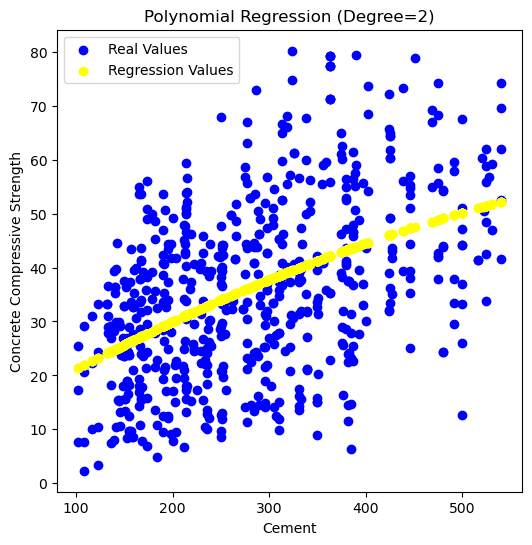


Degree 3:
RMSE for training data: 14.4084
RMSE for testing data: 14.9161
RMSE for validation data: 14.4125


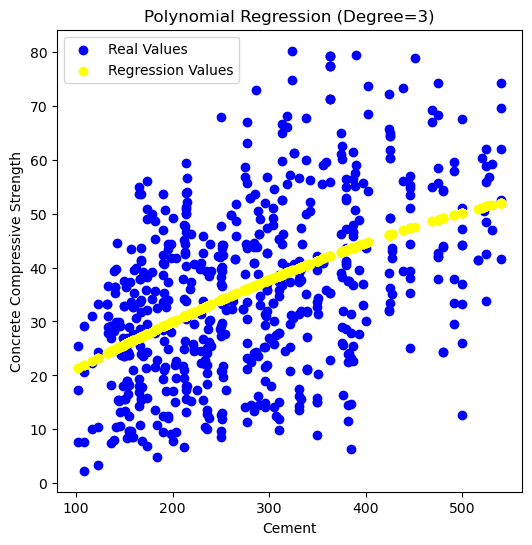


Degree 4:
RMSE for training data: 14.3970
RMSE for testing data: 14.8490
RMSE for validation data: 14.4772


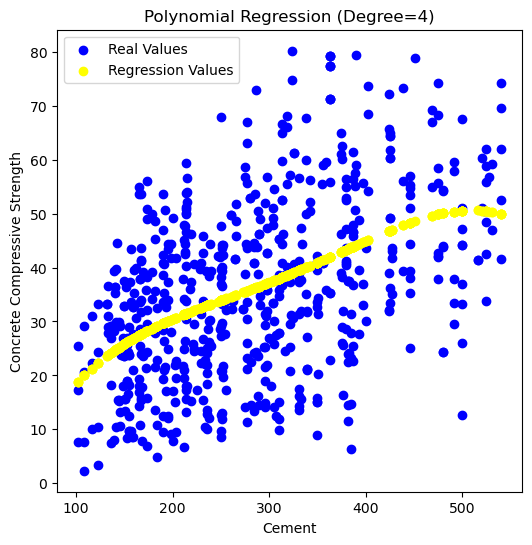


Degree 5:
RMSE for training data: 14.3509
RMSE for testing data: 14.7841
RMSE for validation data: 14.3869


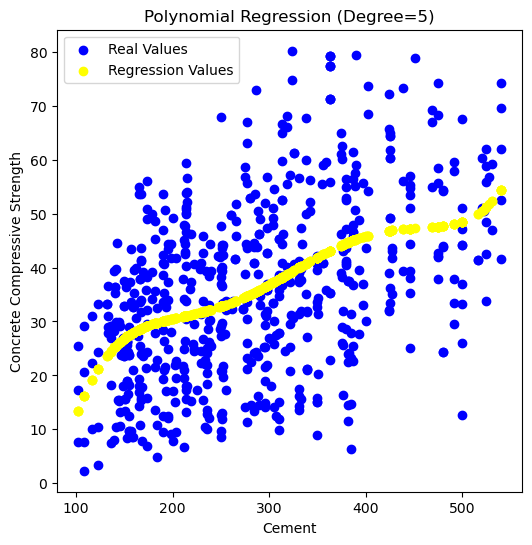

In [ ]:
rmse_train = []
rmse_test = []
rmse_valid = []

for p in range(2, 6):  # Loop over degrees 2 to 5
    print(f"\nDegree {p}:")
    
    poly_features = PolynomialFeatures(degree=p)

    # Fit on training data and transform all
    x_poly_train = poly_features.fit_transform(X_train)
    x_poly_test = poly_features.transform(X_test)
    x_poly_valid = poly_features.transform(X_valid)

    # Train regression model
    regressor = LinearRegression()
    regressor.fit(x_poly_train, y_train)

    # Predictions
    y_pred_train = regressor.predict(x_poly_train)
    y_pred_test = regressor.predict(x_poly_test)
    y_pred_valid = regressor.predict(x_poly_valid)

    # Compute RMSE (root mean squared error)
    rmse_train.append(sqrt(mean_squared_error(y_train, y_pred_train)))
    rmse_test.append(sqrt(mean_squared_error(y_test, y_pred_test)))
    rmse_valid.append(sqrt(mean_squared_error(y_valid, y_pred_valid)))

    # Print results
    print(f"RMSE for training data: {rmse_train[-1]:.4f}")
    print(f"RMSE for testing data: {rmse_test[-1]:.4f}")
    print(f"RMSE for validation data: {rmse_valid[-1]:.4f}")

    # Plot regression curve
    plt.figure(figsize=(6, 6))
    plt.scatter(X_train[:, 0], y_train, label="Real Values", color="blue")
    plt.scatter(X_train[:, 0], y_pred_train, label="Regression Values", color="yellow")
    plt.xlabel("Cement")  # Assuming X_train[:, 0] is cement
    plt.ylabel("Concrete Compressive Strength")
    plt.legend()
    plt.title(f"Polynomial Regression (Degree={p})")
    plt.show()


In [14]:
print(rmse_train)
print(min(rmse_train))

[14.408410957232583, 14.408383199467961, 14.397012982679799, 14.350894560057927]
14.350894560057927


In [17]:
print(rmse_test)
print(min(rmse_test))

[14.916572261154828, 14.916067266966223, 14.849024161458832, 14.784118063238573]
14.784118063238573


In [ ]:
print(rmse_valid)
print(min(rmse_valid))

[14.41159813172856, 14.41248381249439, 14.477221196500581, 14.386932677595654]
14.386932677595654


In [19]:
print(type(rmse_valid))

<class 'list'>


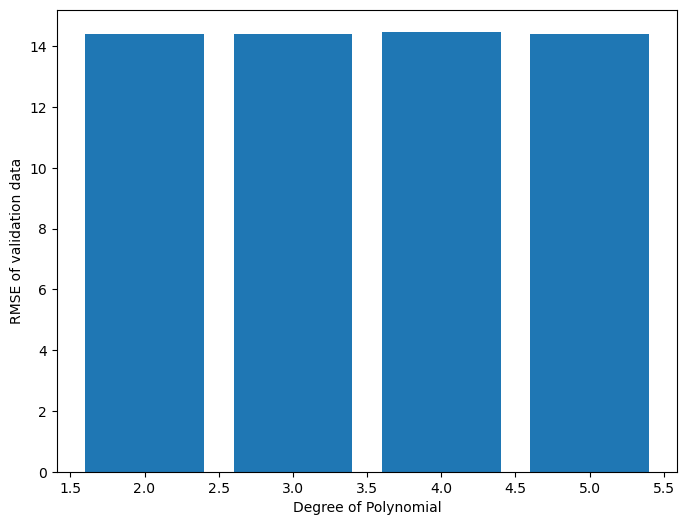

In [20]:
degree = np.arange(2, 6)
plt.figure(figsize=(8,6))
plt.bar(degree, rmse_valid)
plt.xlabel("Degree of Polynomial")
plt.ylabel("RMSE of validation data")
plt.show()

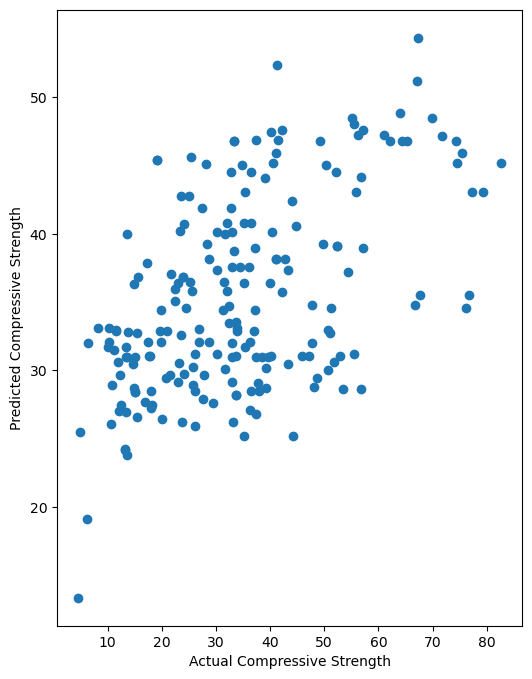

In [23]:
plt.figure(figsize=(6, 8))
plt.scatter(y_test, y_pred_test)
# plt.scatter(, y_pred_train, color="yellow")
plt.xlabel("Actual Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.show()